<center>
    <img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/msp_header.png?raw=1">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Artificial Neural Networks

The so-called **"Convolutional Neural Networks"** are like cascaded filter banks, but with a nonlinear function at the output of each filter and a constant offset, see for instance:

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/4l3uTwFJpdo?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [ ]:
%%html
<iframe src="http://deeplearning.net/tutorial/lenet.html" width="900" height="600">
</iframe>

Its coefficients are called "weights".

The so-called “(Artificial) Neural Networks” simply use a weighted sum instead of the convolution, see:

In [ ]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Artificial_neural_network" width="900" height="600">
</iframe>

and "An Introduction to Neural Computing", I. Aleksander, H. Morton, Chapman and Hall, 1990.

A nice application example for image understanding can be seen in:

In [ ]:
%%html
<iframe src="http://cs.stanford.edu/people/karpathy/deepimagesent/" width="900" height="600">
</iframe>

Both types use several "layers" of cascading. If there are more than 3 layers, they are called **"Deep Neural Networks"**, with **"Deep Learning"**. These are current active research areas, for instance for speech recognition and image recognition. A  popular example is the MNIST handwritten digit recognition, described for instance here:

In [ ]:
%%html
<iframe src="https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/" width="900" height="600">
</iframe>

This example, as most Neural Network implementation, uses Python and its Library "Keras". Another is "Pytorch".

The non-linear function $f(x)$ , also called "activation function" is often the so-called **sigmoid function**, see also:

In [ ]:
%%html
<iframe src="https://en.wikipedia.org/wiki/Sigmoid_function" width="900" height="600">
</iframe>

which is defined as:

$$\large
f(x) := \dfrac{1}{1+e^{-x}}$$

We can plot it with python:

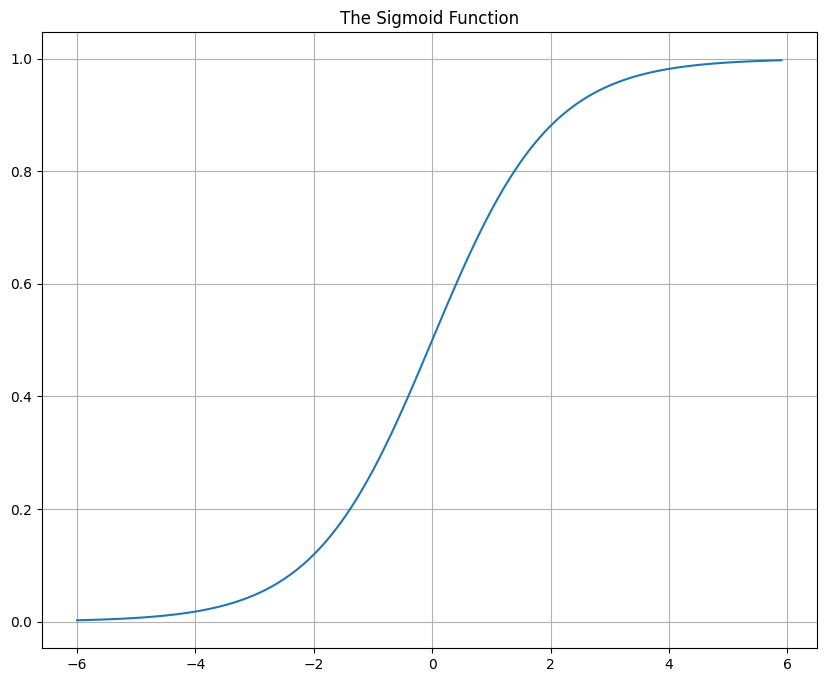

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-6,6,0.1)
y=1/(1+np.exp(-x))
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.title("The Sigmoid Function")
plt.grid()

We see that it behaves like a "soft-limiter" function.

Its derivative is:

$$\large
f'(x)=\dfrac{d}{dx}f(x)=\dfrac{e^x}{\left(1+e^x \right)^2}$$

Often used alternative activation functions are "tanh", "relu" (Rectified Linear Unit, which returns `x if x > 0,  alpha*x if x < 0` and more:

In [ ]:
%%html
<iframe src="https://keras.io/activations/" width="900" height="600">
</iframe>

The following diagram shows a 3-layer artificial neural network,


<center>
    <br>
    <img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/Lecture16_01_convNet.png?raw=1" width="700"/>
</center>

Where

$$\large
f(x) := \dfrac{1}{1+e^{-x}}$$

The values with index 0 are often assumed to be "biases", fixed values. In general we have several outputs in our neural network, **output k** is the non-linear function of a sum $S_{o,k}$, $O_k=f(S_{o,k})$.

The sum is the weighted sum from the hidden layer outputs $h_j$. We choose $x_0=h_0=1$, such that we also obtain a constant offset as part of the sum:

$$\large
S_{o,k} = \sum_j w_{o,j,k} h_j $$

The output of the hidden layer $h_j$ is again a nonlinear function *f* of a sum $h_j=f \left(s_{h,j}\right)$.

The hidden layer sum is a weighted sum of input values $x_i$:

$$\large
S_{h,j} = \sum_i w_{h,i,j} x_i $$

The output of our neural network depends on the weights *w* and the inputs *x* (we assume a fixed sigmoid function). We assemble the inputs in the vector x which contains all the inputs, $x=[x_0, x_1,\dots]$ and vector *w* which contains all the weights (from the hidden and the output layer), $w=[w_{h,0,0}, w_{h,0,1}, \dots , w_{O,0,0}, W_{O,0,1}, \dots ]$

To express this dependency, we can rewrite the **output k** as $O_k(\mathbf{x,w})$.

Now we would like to "train" the network, meaning we would like to determine the weights such that if we present the neural network with a training pattern in **x**, the output produces a desired value. For instance, if we present an image with an object in it, the output indicates that the object was there with a desired output value. Hence we have **training inputs**, and **desired outputs $d_k$** (also called the **"target"**). We now use **optimization** to update the weights *w* to obtain outputs $o_k$ as close as possible to the desired outputs $d_k$ with a given input *x*.

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/_GKIBe9kHQM?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We use **Gradient Descent** for this optimization.

We start with an error function delta:

$$\large
\delta_k(x,w)=O_k(x,w)-d_k$$

An always positive Error function is its square:

$$\large
Err_k(x,w)=\dfrac{1}{2}\cdot(\delta_k(x,w))^2 $$

This is also called **"Loss Function"**, and this particular choice, the mean_squared_error.

To this error or function we can now apply **Gradient Descent**, also called **Stochastic Gradient Descend ('sgd')** in our case of Neural Network training:

$$\large
x_{new} = x_{old} - \alpha \cdot \nabla f(x_{old})$$

in our case this becomes:

$$\large
\begin{equation}\tag{2}
w_{new}=w_{old}- \alpha \cdot \nabla Err_k(x,w_{old})
\end{equation}$$

For the gradient $\nabla$ we need to compute the derivative to each weight $w_i$ of the weight vector **w**. In our case we apply the chain rule (outer derivative times inner derivative),

$$\large \tag{3}
\dfrac{d}{dw_i}Err_k(x,w)=\dfrac{d}{dw_i}\dfrac{1}{2}\cdot\delta_k^2(x,w) = \\
\large
= \delta_k(x,w) \cdot \underbrace{\dfrac{d}{dw_i}\delta_k(x,w)}_\textrm{inner derivative} = \\
\large
\begin{equation}
= \delta_k(x,w)\cdot \underbrace{\dfrac{d}{dw_i} O_k(x,w)}_\textrm{inner derivative}
\end{equation}$$

We compute this inner derivative first for the **output weights**, again with the chain rule:
$$\large
\dfrac{d}{dw_{o,j,k}} O_k(x,w) = \\
\large
\dfrac{d}{dw_{o,j,k}} f(S_{o,k}) = f'(S_{o,k}) \cdot \dfrac{d}{dw_{o,j,k}}S_{o,k} \\
\large
= f'(S_{o,k})\dfrac{d}{dw_{o,j,k}}\sum_{j'}w_{o,j',k}h_j
$$

finally we get:
$$\large
\begin{equation} \tag{4}
\dfrac{d}{dw_{o,j,k}} O_k(\mathbf{x,w})=f'(S_{o,k}) \cdot h_j
\end{equation}
$$

We now plug this result (4) into eq. (3) and eq. (2), and obtain the update rule for the Gradient Descent for the output weights:

$$\large
w_{o,j,new} = w_{o,j,old}-\alpha \cdot \delta_k(\mathbf{x,w})f'(S_{o,k}) \cdot h_j
$$

which says: **update = alpha** times **output delta** times **output derivative** times its **input** $h_j$ from the hidden nodes.
Observe the only **local processing** for the update, which makes it suitable for massively **parallel processing**, e.g. in a Graphics Processing Unit!

For the hidden weights the inner derivative of eq. (3) becomes a little more complicated:

$$\large
\dfrac{d}{dw_{h,i,j}} O_k(\mathbf{x,w}) = \\
\large
\dfrac{d}{dw_{h,i,j}}f(S_{o,k}=f'(S_{o,k})\cdot \dfrac{d}{dw_{h,i,j}}S_{o,k} \\
\large
= f'(S_{o,k}) \dfrac{d}{dw_{h,i,j}} \sum_j w_{o,j,k}h_j \\
\\
\large
= f'(S_{o,k}) \cdot w_{o,j,k} \dfrac{d}{dw_{h,i,j}} h_j \\
\large
f'(S_{o,k}) \cdot w_{o,j,k} \dfrac{d}{dw_{h,i,j}} f(S_{h,j})
$$

apply the chain rule:

$$\large
= f'(S_{o,k}) \cdot w_{o,j,k} \cdot f'(S_{h,j}) \dfrac{d}{dw_{h,i,j}} S_{h,j}) \\
\large
= f'(S_{o,k}) \cdot w_{o,j,k} \cdot f'(S_{h,j}) \dfrac{d}{dw_{h,i,j}} \sum_i w_{h,i,j}x_i
$$

finally we get:

$$\large
\begin{equation} \tag{5}
\dfrac{d}{dw_{h,i,j}} O_k(\mathbf{x,w}) = f'(S_{o,k}) \cdot w_{o,j,k} \cdot f'(S_{h,j}) \cdot c_i
\end{equation}
$$

We now plug this result for the hidden weights (5) again into eq. (3) and eq. (2), and obtain the **update rule** for the Gradient Descent for the **hidden weights**:

$$\large
\begin{equation} \tag{6}
w_{h,i,j,new} = w_{h,i,j,old}-\alpha \cdot \delta_{h,k} (\mathbf{x,w}) \cdot f'(S_{h,j}) \cdot x_i
\end{equation}
$$

which says: **update** = **alpha** times **back propagated delta** times **derivative of hidden function** times its input $x_i$.


This algorithm is also called **Back-Propagation**. We need to do this update for each output node *k*.

This is in principle the same rule as for the output nodes, **just with its corresponding input and output.**

**This means: Back-Propagation** is just a consequence of applying the **Gradient Descent** algorithm to Neural Networks. A popular alternative to or refinement of Gradient Descent in Neural Networks is the algorithm **"Adam"**, see also:

In [ ]:
%%html
<iframe src="https://keras.io/optimizers/" width="900" height="600"></iframe>

Hence for all nodes we obtain a **"local" processing**. We just look at one node, call its input $x_i$ , its output *o* , its weights $w_i$, and its desired output *d*. Then we obtain its output with:

$$\large
s=\sum_i w_i x_i$$

$$o=f(s)$$

If it is an **output node** the difference delta to the desired *d* is:

$$\large
\delta = o -d $$

if it is a **hidden node** we use the **"back propagated"** $\mathbf{\delta}$ from an output difference $\delta_o$, weight to the output node $w_o$ , and sum for the output node $s_o$ :

$$\large
\delta = \delta_0 \cdot f'(S_o) \cdot w_o $$

Then we get the **local weight update** as:

$$\large
w_{i,new} = w_{i,old} - \alpha \cdot \delta \cdot f'(s) \cdot x_i $$

This is depicted in the following diagram:

<center>
    <br>
    <img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/blob/master/images/Lecture16_02_neuron.png?raw=1" width="700"/>
</center>

Weight update during training with output difference $\delta$:

$$\large
w_{i,new} = w_{i,old} - \alpha \cdot f'(S) \cdot x_i $$

## Python Example for the MNIST Digit Recognition:

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/6SJG9usU8ls?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [11]:
#from: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
# mnistexample.py

import warnings
warnings.filterwarnings('ignore')

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

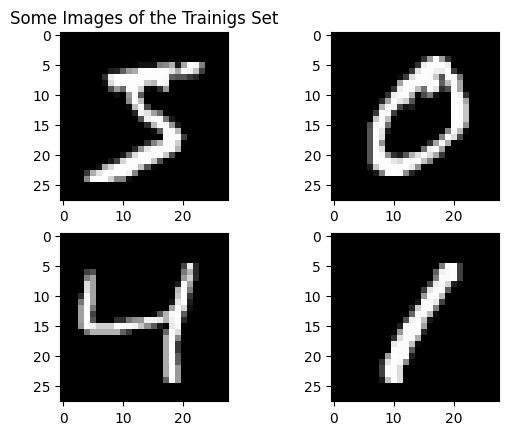

In [12]:
# Plot ad hoc mnist instances
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [13]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

X_testunflat=X_test.copy() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
print( "X_train.shape=", X_train.shape)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

X_train.shape= (60000, 28, 28)


In [14]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/2
300/300 - 6s - loss: 0.2821 - accuracy: 0.9190 - val_loss: 0.1452 - val_accuracy: 0.9592 - 6s/epoch - 21ms/step
Epoch 2/2
300/300 - 6s - loss: 0.1127 - accuracy: 0.9674 - val_loss: 0.1027 - val_accuracy: 0.9682 - 6s/epoch - 21ms/step
Baseline Error: 3.18%


sample.shape= (784,)
1/1 [==============================] - 0s 69ms/step
prediction= [[9.9995410e-01 4.7844914e-08 6.9813864e-06 1.8878661e-06 3.0065465e-07
  1.1542194e-05 1.2499848e-05 1.0790896e-05 1.4159448e-08 1.8016929e-06]]


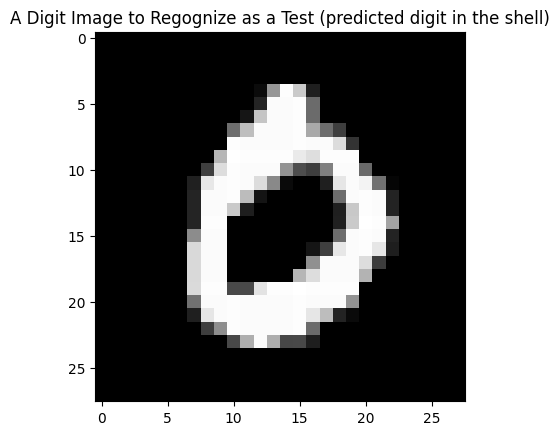

In [21]:
digit=3
plt.imshow(X_testunflat[digit], cmap=plt.get_cmap('gray'))
plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

sample=X_test[digit,:]
print("sample.shape=", sample.shape)
prediction=model.predict(numpy.expand_dims(sample,0))
print("prediction=", prediction)

plt.show()

# Convolution Neural Networks

In Convolutional Neural Networks, each layer basically consist of **filter banks**, were fixed **bias** terms are added to each output, and the result is passed through a non-linearity. The filters are called **"Receptive Fields"**, in analogy to the processing e.g. in the retina of the eye.

The filter coefficients and bias terms are then optimized according to a target function and a loss function, which computes the "distance" to the target function.

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/rWWeAD56uM8?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

## Python Keras Convolutional Neural Network Example

Most of Neural Network development is done in Python. It has powerful libraries for it, for instance "Keras" and "Theano" or "Tensorflow". Python Keras and Theano are libraries to compute and train neural networks. See also:

In [ ]:
%%html
<iframe src="https://keras.io/getting-started/faq/" width="900" height="600"></iframe>

In our example, we want to detect a signal in a sequence, here a “ramp” function np.arange(5), using a convolutional neural network.

In a Keras example, we first define input (data) and desired output (target).

For the input, we prepend and append a few zeros to the ramp function, such that the neural network has to find the position of the ramp:

`X = np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),
np.zeros((1,9))))`

We need to expand dimensions because Keras expects *X* with shape (batch, length, channels), with:

"batch": training examples (here only 1 batch)<br>
"length": length of our signals (here 23)<br>
"channels": Channels of our data, for instance for stereo, here 1 channel.

The target signal has the same sizes on this case, because the “causal” network returns the same number of samples at the output as the input. We set it up as containing all zeros, except for a 1 at the time of detecting the pattern:

`Y = np.zeros((1,23))
Y[0,16]=1 #Detecting the signal at its end`

Expanding dimensions:

`Y=Y.transpose()
Y=np.expand_dims(Y, axis=0)`

Then we set up a neural network model starting with:

`model = Sequential()`

A convolutional layer is added with:

`model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal', activation="linear", use_bias=False, kernel_initializer='glorot_uniform', input_shape=(23,1)) )`

A filter here is used to detect a pattern, similar to a matched filter in our lecture "Advanced Digital Signal Processing", Slides 13 (see our Website). The "kernel_size" is the size of our filters impulse response, here it can detect patterns of  length 8 samples.

"strides=1" means there is no downsampling,<br>
"padding='causal'" means there is zero-padding of kernel_size-1 zeros before the beginning of our signal, <br>
"activation='linear'" means there is no nonlinearity after the summation, <br>
"use_bias=False" means the bias is zero, <br>
"kernel_initializer" is the (random) initialization of the weights at the beginning of training, <br>
"input_shape" is the size of the signal at the layers input.

Then we need to "compile" the model and specify the used error function and optimizer:

`model.compile(loss='mean_absolute_error',optimizer='adam')`

"loss" is the error function, here the mean absolute error between network output and the target,<br>
"optimizer" is the optimization function to use to obtain the "best" weights, here "adam", which seems to be the best.

Then we can train the model with: <br>
`model.fit(X, Y, epochs=5000, batch_size=1)`


where "X" is the data or signal, <br>
"Y" is the traget, <br>
"epochs" is the number of iterations the optimizers uses, <br>
"batch_size" is the number of examples we have, here just 1.

After the optimization finished, we can use our model for prediction, here detecting the signal (usually a separate test signal is used, which differs from the training signal, but here we take the same for simplicity):<br>
`predictions=model.predict(X)`

we can read out the resulting weights with `ww = model.get_weights()`

The first index refers to the layer, here we only have 1, hence the index is 0, then the next index refers to the input dimension, the next to the output dimension (we have only one output neuron, hence the index is 0), and finally the channels index, again 0.

Hence our filter weights are:
`weights=ww[0][:,0,0]`

We can also save the weights in a “pickle” file:

`
with open("convnetweights.pickle", 'wb') as weightfile:
pickle.dump(ww, weightfile)
`

Using pickle has the advantage that we can more easily analyse and modify the weights if we wish, compared to `model.save_weights('weights.hdf5').`

We can now plot the output of the neural network, the weights, and the input. The output and the weights have the same fomat as the input, (batch, length, channels), in our case the first and last index is 0:
```python
plt.plot(predictions[0,:,0])
plt.title('The Conv. Neural Network Output')
plt.figure()
plt.plot(weights)
plt.title('The Weights')
plt.figure()
plt.plot(X[0,:,0])
plt.title('The Input Signal')
plt.show()
```

\# -*- coding: utf-8 -*-
\__author__ = 'Gerald Schuller'
\__copyright__ = 'G.S.'

"""
Simple program to use a convolutional neural network to obtain a matched filter, or an analysis filter bank, with filtering followed by downsampling.
Gerald Schuller, July 2017.
"""

In [24]:
# keras_simpl_convnet.py
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv1D
from keras.constraints import unit_norm
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [25]:
def generate_dummy_data():
    #Method to generate some artificial data in an numpy array form in order to fit the network.
    #:return: X, Y numpy arrays used for training, X: Input, Y: Target

    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #input X with shape (batch, length, channels), channels: e.g. RGB
    #https://stackoverflow.com/questions/43235531/convolutional-neural-network-conv1d-input-shape
    X=X.transpose()  #signal in the middle dimension
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)

    #Target function Y, the desired output:
    Y = np.zeros((1,23))
    Y[0,16]=1 #Detecting the signal at its end (for convolution padding='causal').
    #Make target a shape keras expects, same as input X shape:
    Y=Y.transpose()
    Y=np.expand_dims(Y, axis=0)
    return X, Y

In [26]:
def generate_model():
    #    Method to construct a convolutional neural network using keras and theano.
    #    :return: Trainable object

    # Define the model.
    model = Sequential()
    #Obtain a linear filter from a convolutional layer, similar to a matched filter:
    model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal', activation="linear",
                     use_bias=False, kernel_initializer='glorot_uniform', input_shape=(23,1)) )
    #uniform initialization:
    #model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal, activation="linear", use_bias=False, kernel_initializer='uniform', input_shape=(23,1)) )

    # Compile appropriate theano functions
    #losses: https://keras.io/losses/
    #mean_squared_error ('mse'), mean_absolute_error(y_true, y_pred), mean_squared_logarithmic_error,...
    #model.compile(loss='mean_squared_error', optimizer='sgd')
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [27]:
#   Demonstration on using the code.
X, Y = generate_dummy_data() # Acquire Training Dataset
print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)

Input X[0,:,0]= [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18257419 0.36514837
 0.54772256 0.73029674 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ] X.shape= (1, 23, 1)
Target Y[0,:,0]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Y.shape= (1, 23, 1)


In [40]:
model = generate_model()     # Compile an neural net
print("Train model:")
model.fit(X, Y, epochs=5000, batch_size=1)  #use 5000 epochs or iterations for training
model.evaluate(X, Y,  batch_size=1, verbose=1)
predictions=model.predict(X) # Make Predictions based on the obtained weights
ww = model.get_weights()   #read obtained weights
#weight format for Conv1d:
#[0: filter weights, 1: bias for first layer]
#[filterlength, channels (subbands) in previous layer, neurons/filters in this layer]
weights=ww[0][:,0,0]

Train model:


TypeError: Cannot convert the argument `type_value`: torch.float32 to a TensorFlow DType.

In [ ]:
print("Predictions[0,:,0]= ", predictions[0,:,0])
print("weights= ", weights)

Predictions[0,:,0]=  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  1.9465022e-02  5.4520871e-02
 -9.7856916e-02 -2.2450089e-04  5.0064176e-05  2.5923151e-04
  1.0000045e+00 -4.9043181e-05  1.0209267e-04 -2.1091430e-05
 -5.2968404e-05  0.0000000e+00  0.0000000e+00]
weights=  [-7.2529976e-05  2.5516856e-05  1.5692349e-04 -1.7947370e-04
  1.3693624e+00 -1.0266163e+00  8.5394479e-02  1.0661432e-01]


In [ ]:
#model.save_weights('weights.hdf5') #save weights to file
with open("convnetweights.pickle", 'wb') as weightfile:
    pickle.dump(ww, weightfile)

After the 5000 iterations of the optimization, were we can observe the decline of the loss function, we get the following plots,

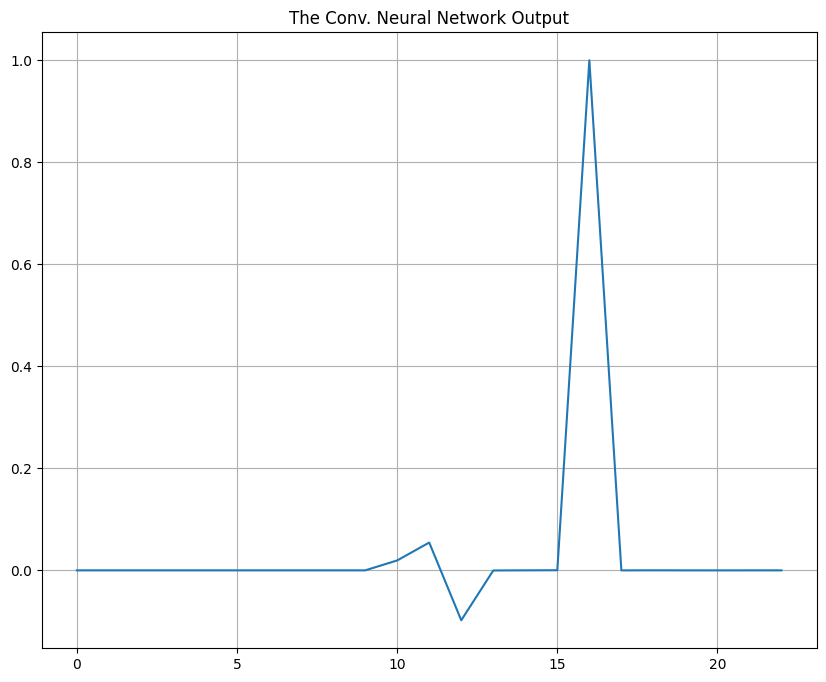

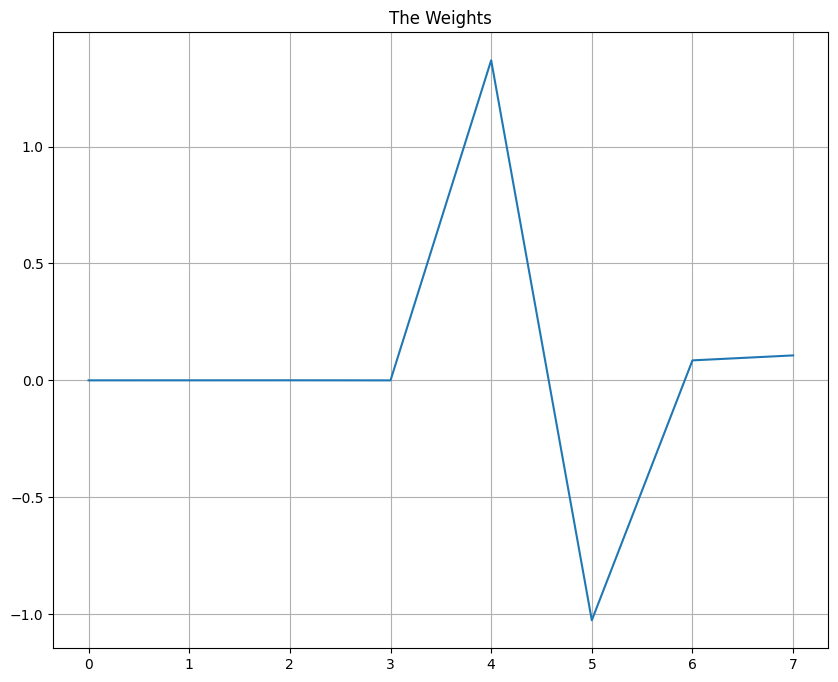

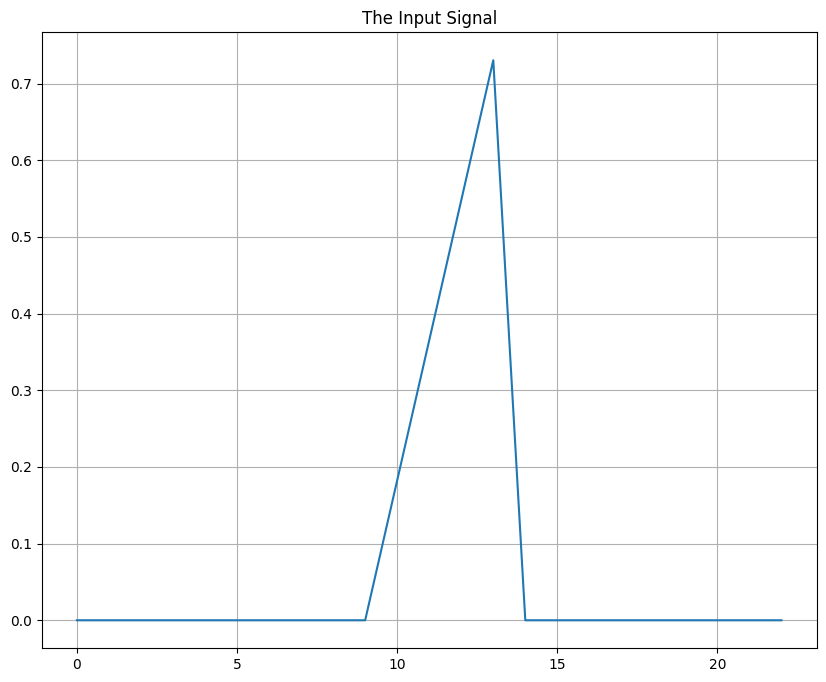

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(predictions[0,:,0])
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights)
plt.grid()
plt.title('The Weights')
plt.figure(figsize=(10,8))
plt.plot(X[0,:,0])
plt.title('The Input Signal')
plt.grid()

Look at the weights plot, and compare it to a matched filter, which is used to detect a signal with a maximum possible Signal-to-Noise ratio ( our lecture “Advanced Digital Signal Processing”, Slides 13).

In [ ]:
%%html
<iframe src="https://nbviewer.jupyter.org/github/GuitarsAI/ADSP_Tutorials/blob/master/ADSP_13_Matched_Filters.ipynb" width="900" height="600">
</iframe>

In the matched filter case, the weights should be the signal to detect, but time reversed (here a reversed ramp function). But our weights function looks quite different.

This is because we specified a target function which only has a very narrow "peak", and this is what we also observe at the output of our convolutional neural network. This may not have a maximum SNR, but a more narrow peak at detection, which enables a more precise location of our pattern!

If we choose **"padding='valid'"** in our convolutional layer (as is the default), then no zero-padding of kernel_size-1 zeros before the signal starts is done, and hence the output of the convolutional layer will be accordingly shorter than the input.

But we can obtain the same results if we remove accordingly kernel_size-1 (or filterlength-1) samples from the beginning of the target function with:

`gap=int(filterlength)-1
Y=Y[:,gap:,:]`

Just remember that the output is accordingly shorter, kernel-size-1 samples in the beginning are missing compared to padding="causal". We can let it run with:

In [ ]:
filterlength=8

#   Demonstration on using the code.
X, Y = generate_dummy_data() # Acquire Training Dataset
print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
#gap = filterlength-1, in this way the delay becomes like with 'causal':
gap=int(filterlength)-1
Y=Y[:,gap:,:]
print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)

Input X[0,:,0]= [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18257419 0.36514837
 0.54772256 0.73029674 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ] X.shape= (1, 23, 1)
Target Y[0,:,0]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Y.shape= (1, 16, 1)


In [ ]:
def generate_model():
    #    Method to construct a convolutional neural network using keras and theano.
    #    :return: Trainable object

    # Define the model.
    model = Sequential()
    #Obtain a linear filter from a convolutional layer, similar to a matched filter:
    model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='valid', activation="linear", use_bias=False, kernel_initializer='glorot_uniform', input_shape=(23,1)) )
    #uniform initialization:
    #model.add(Conv1D(filters=1, kernel_size=(8), strides=1, padding='causal, activation="linear", use_bias=False, kernel_initializer='uniform', input_shape=(23,1)) )

    # Compile appropriate theano functions
    #losses: https://keras.io/losses/
    #mean_squared_error ('mse'), mean_absolute_error(y_true, y_pred), mean_squared_logarithmic_error,...
    #model.compile(loss='mean_squared_error', optimizer='sgd')
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

In [ ]:
model = generate_model()     # Compile an neural net
print("Train model:")
model.fit(X, Y, epochs=5000, batch_size=1)  #use 7000 epochs or iterations for training
model.evaluate(X, Y,  batch_size=1, verbose=1)
predictions=model.predict(X) # Make Predictions based on the obtained weights
ww = model.get_weights()   #read obtained weights
weights=ww[0][:,0,0]

Streaming output truncated to the last 5000 lines.
Epoch 1357/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0448
Epoch 1358/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0448
Epoch 1359/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0447
Epoch 1360/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0447
Epoch 1361/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0447
Epoch 1362/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0446
Epoch 1363/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0446
Epoch 1364/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 1365/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 1366/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 1367/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 1368/5000
1/1 [=========================

In [ ]:
print("Predictions[0,:,0]= ", predictions[0,:,0])
print("weights= ", weights)

#model.save_weights('weights.hdf5') #save weights to file
with open("convnetweights.pickle", 'wb') as weightfile:
    pickle.dump(ww, weightfile)

Predictions[0,:,0]=  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.94947589e-02
  5.46439402e-02 -9.77095217e-02 -1.14411116e-04  8.94069672e-07
 -2.01278075e-04  9.99729574e-01 -1.42302917e-04 -1.89879385e-04
 -1.38634656e-04 -1.97046320e-04  0.00000000e+00  0.00000000e+00]
weights=  [-2.6981678e-04  1.2529272e-05 -1.3449162e-04 -3.2798005e-05
  1.3690249e+00 -1.0269943e+00  8.5742801e-02  1.0677720e-01]


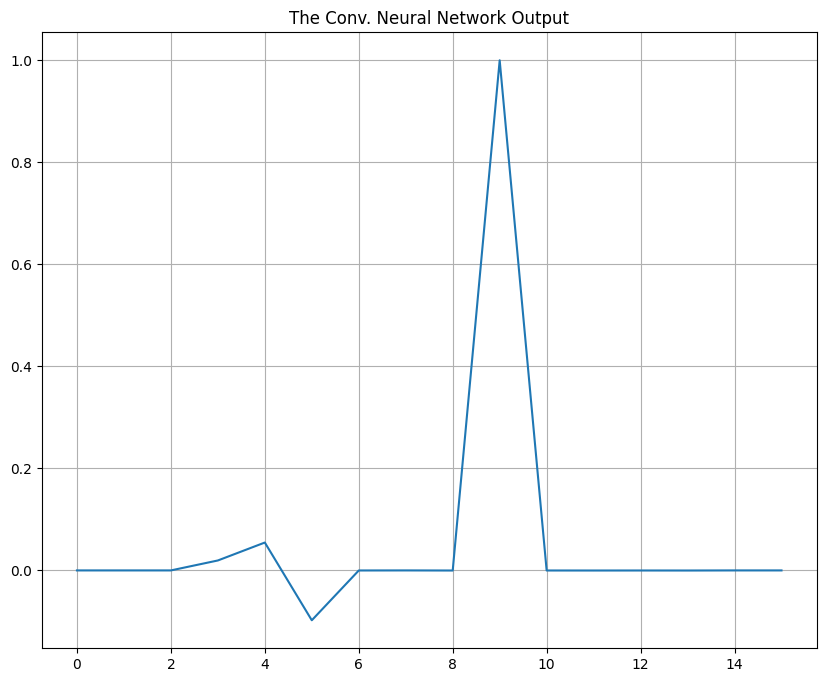

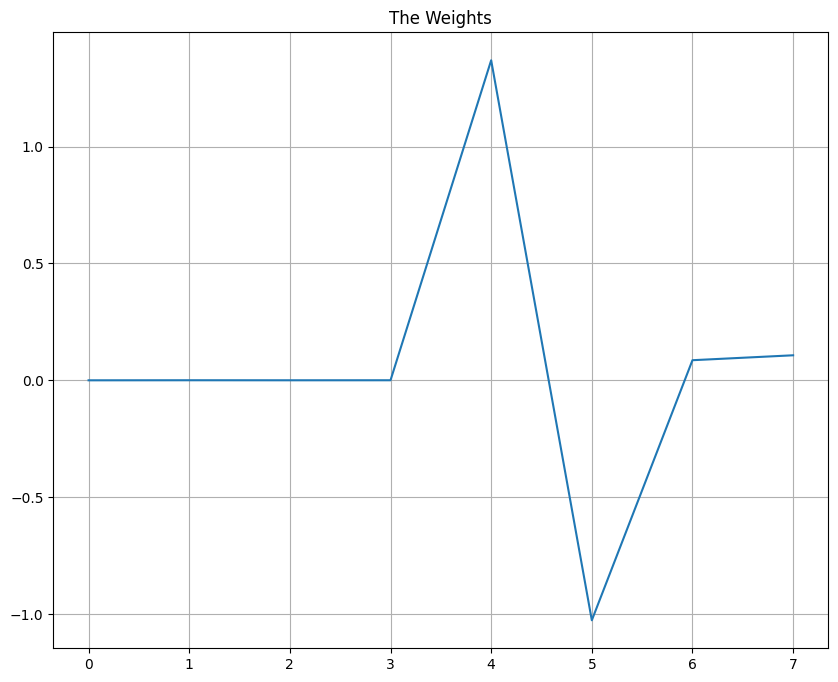

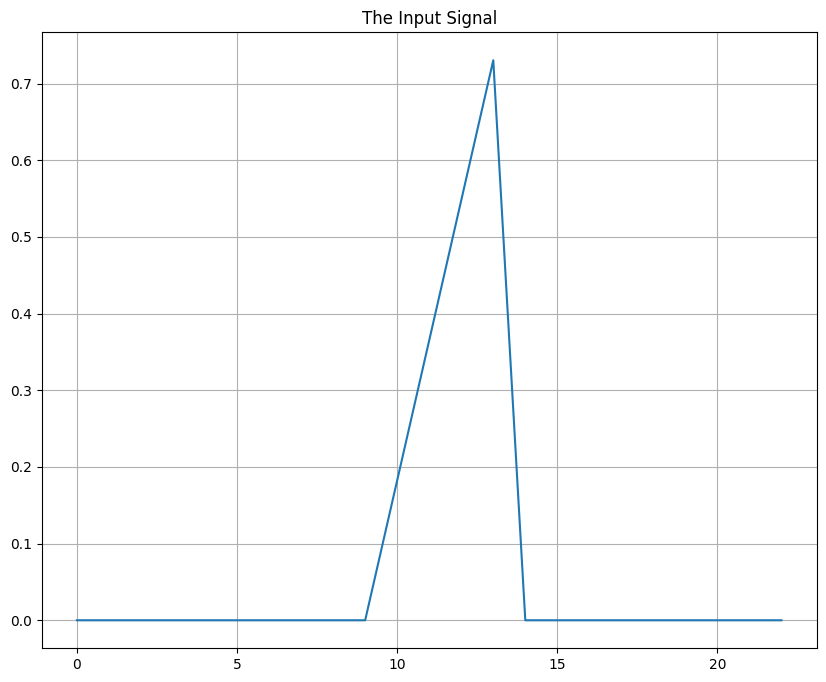

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(predictions[0,:,0])
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights)
plt.grid()
plt.title('The Weights')
plt.figure(figsize=(10,8))
plt.plot(X[0,:,0])
plt.title('The Input Signal')
plt.grid()

## Implementation using Python PyTorch

Pytorch is an alternative to Keras. Pytorch is used when more control of the neural network structure is desired. Our example for a convolutional neural network with causal padding:

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/_GzpaojzhBY?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

\# -*- coding: utf-8 -*-
\__author__ = 'Gerald Schuller'
\__copyright__ = 'G.S.'

"""
Simple program to use a convolutional neural network to obtain a matched filter, or an analysis filter bank, with filtering followed by downsampling, using pytorch.
Gerald Schuller, July 2018.
"""

In [29]:
# pytorch_simpl_convnet.py
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [30]:
def generate_dummy_data():
    #Method to generate some artificial data in an numpy array form in order to fit the network.
    #:return: X, Y numpy arrays used for training, X: Input, Y: Target

    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #input X with shape (batch, channels, length), channels: e.g. RGB
    #https://pytorch.org/docs/stable/nn.html
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)

    #Target function Y, the desired output:
    Y = np.zeros((1,30))
    Y[0,16]=1 #Detecting the signal at its end (for convolution padding='causal').
    #Make target a shape pytorch expects, same as input X shape:
    Y=np.expand_dims(Y, axis=0)
    return X, Y

In [31]:
#   Demonstration on using the code.
X, Y = generate_dummy_data() # Acquire Training Dataset
#print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
#print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)
X=torch.from_numpy(X)
Y=torch.from_numpy(Y)
X=X.type(torch.Tensor)
Y=Y.type(torch.Tensor)
#X = torch.randn(1, 1, 23)
#Y = torch.randn(1, 1, 30)
#print("Input X[0,:,0]=", X[0,:,0], "X.shape=", X.shape )
#print("Target Y[0,:,0]=", Y[0,:,0], "Y.shape=", Y.shape)
print("X=",X)
print("Y=",Y)

X= tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1826, 0.3651, 0.5477, 0.7303, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])
Y= tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])


In [32]:
print("Generate Model:")
#model = generate_model()     # Compile an neural net
#input size (N,Cin,L), N is a batch size, C denotes a number of channels, L is a length of signal sequence.
#padding=kernel_size-1 corresponds to "causal" in Keras:
model= nn.Sequential(nn.Conv1d(in_channels=1, out_channels=1, kernel_size=8,
                               stride=1, padding=7,groups=1, bias=False),)
#model= nn.Conv1d(1,1,kernel_size=8)
print("Def. loss function:")
loss_fn = nn.MSELoss()
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

Generate Model:
Def. loss function:


In [37]:
for epoch in range(5000):
    Ypred=model(X)
    loss=loss_fn(Ypred, Y)
    if epoch%100==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.000599728780798614
100 0.0005472212797030807
200 0.0005062880809418857
300 0.00047484581591561437
400 0.00045107287587597966
500 0.00043340103002265096
600 0.00042050101910717785
700 0.0004112633760087192
800 0.00040478268056176603
900 0.0004003331996500492
1000 0.00039734752499498427
1100 0.00039539221324957907
1200 0.0003941439790651202
1300 0.000393368216464296
1400 0.0003928997030016035
1500 0.00039262507925741374
1600 0.00039246914093382657
1700 0.00039238331373780966
1800 0.00039233785355463624
1900 0.00039231462869793177
2000 0.00039230313268490136
2100 0.00039229774847626686
2200 0.00039229533285833895
2300 0.0003922943433281034
2400 0.00039229390677064657
2500 0.00039229364483617246
2600 0.000392293615732342
2700 0.00039229352842085063
2800 0.0003922935575246811
2900 0.00039229352842085063
3000 0.00039229352842085063
3100 0.00039229352842085063
3200 0.0003922935575246811
3300 0.00039229364483617246
3400 0.0003922935575246811
3500 0.00039229364483617246
3600 0.0003922935866

In [38]:
Ypred=model(X)
Ypred=Ypred.data.numpy()
print("Predictions= ", Ypred[0,0,:])
weights=list(model.parameters())
print("Pytorch weights=", weights[0].data.numpy())
#Save in Pytorch format:
torch.save(model.state_dict(), 'model.ckpt')
#save weights to Pickle file:
with open("pytorchconvnetweights.pickle", 'wb') as weightfile:
    pickle.dump(weights, weightfile)

Predictions=  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  2.3577176e-02  6.3952036e-02
 -7.9983786e-02  2.2117535e-02  7.4157268e-03  3.3755952e-03
  9.8822987e-01  5.2858684e-03  1.0767616e-03 -5.0797319e-04
 -1.4788677e-03  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
Pytorch weights= [[[-2.0250231e-03  8.2319637e-04  1.8695308e-03  5.9304829e-03
    1.3476011e+00 -1.0095112e+00  9.2004701e-02  1.2913752e-01]]]


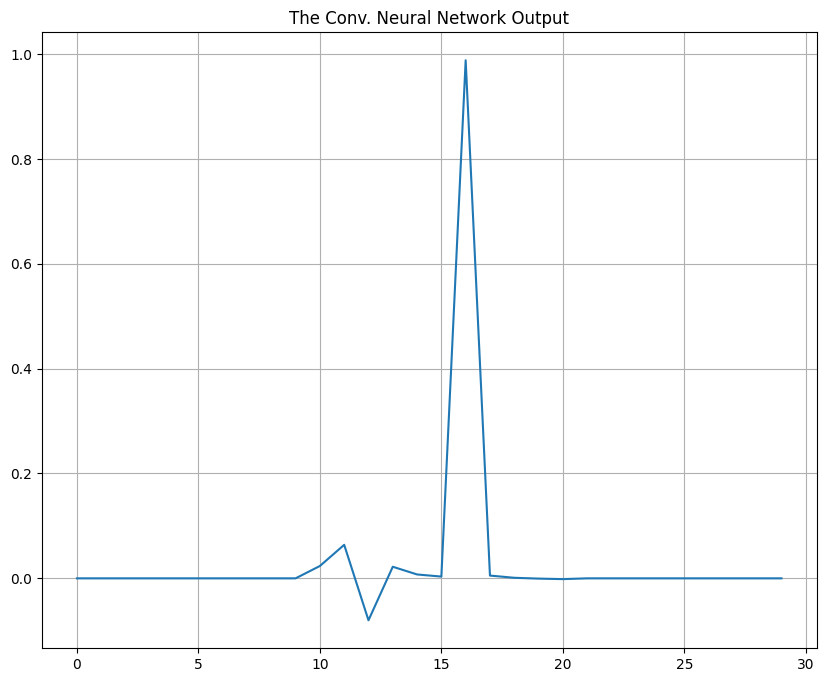

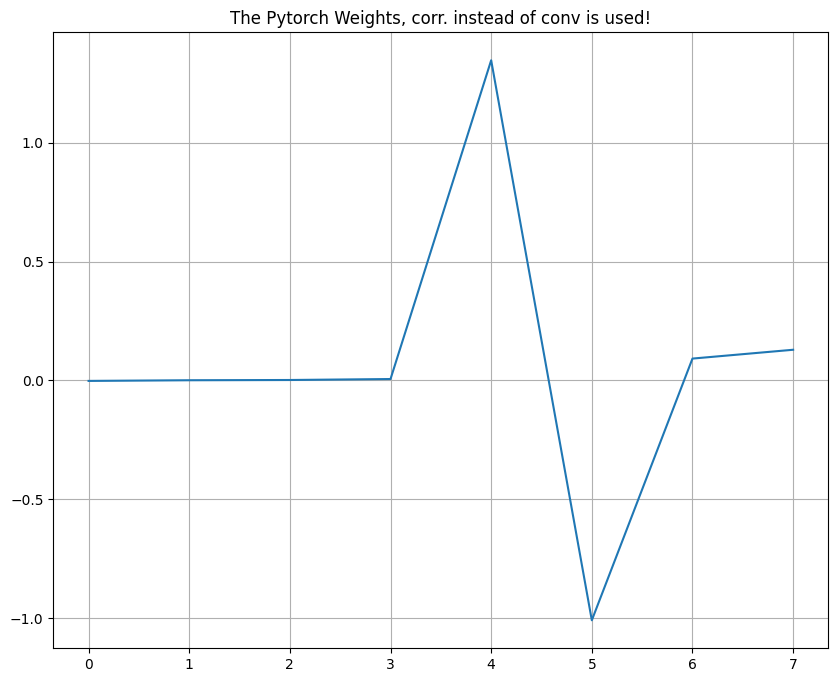

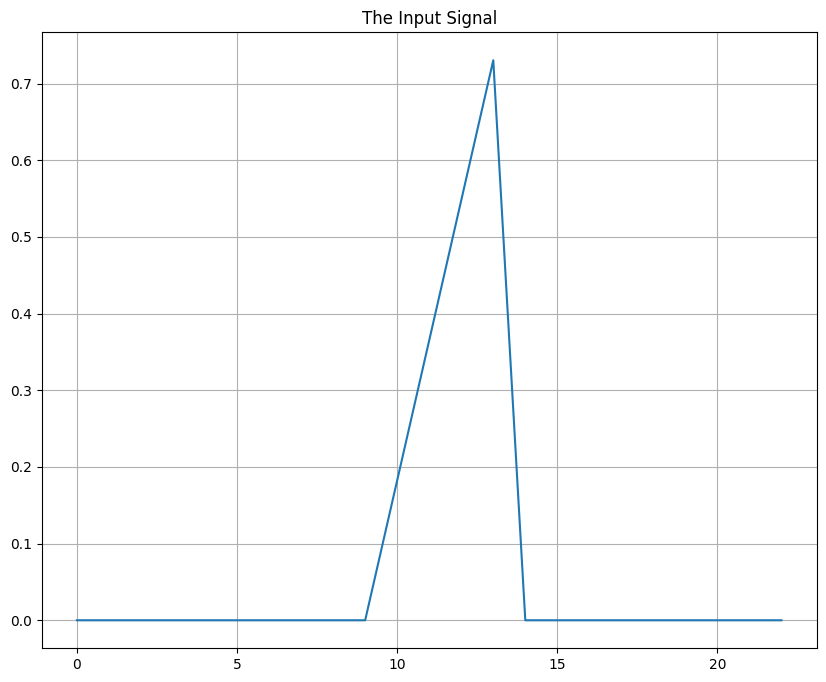

In [39]:
plt.figure(figsize=(10,8))
plt.plot(Ypred[0,0,:])
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights[0].data.numpy()[0,0,:])
plt.title('The Pytorch Weights, corr. instead of conv is used!')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(X[0,0,:].numpy())
plt.title('The Input Signal')
plt.grid()

Pytorch uses correlation instead of convolution for its filtering process, see:

In [ ]:
%%html
<iframe src="https://pytorch.org/docs/stable/nn.html" width="900" height="400">
</iframe>

## Implementation using a Dense Net

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/zj7ueZvotqs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In audio processing, the Conv1D layer is useful when the entire audio signal is in memory. Then the convolution can be seen as shifting the time reversed impulse response (the weights) along the audio signal to produce the output of the convolution.

But when we would like to do real time audio processing, the audio signal arrives block by block from the sound card, and we should process them as they arrive. This can be seen as shifting the audio signal along the time reversed impulse response (the weights).

We can implement this using a "dense" neural network layer, using a keras "Dense" layer. This layer has different defintions for the weights and the input, hence we need to translate them for this layer. The "Dense" layer basically implements a matrix multiplication, where the input signal is a row vector from the left and the matrix from the right contains the weights (in our case this matrix is a column vector).

First the weights. They don’t have the "channel" dimension, hence we need to remove it:

`weights[0]=weights[0][:,:,0]`

then we need to apply the time reversal from the convolution to it:

`weights[0]=np.flip(weights[0], axis=0)`

The we can set up a dense neural network model:

`filtlen=len(weights[0])
model = Sequential()
model.add(Dense(units=1, activation='linear',
use_bias=False, input_shape=(filtlen,)) )
model.set_weights(weights)`

Finally we need to transpose the input to be a row vector:

`X=np.transpose(X,axes=(0,2,1))`

Then we can loop over the signal. Here it still comes from the signal in memory, but it could also come from the sound card:

```python
for n in range(siglen-filtlen):
    #cut out the current signal block:
    Xblock=X[0,:,n:n+filtlen]
    prediction[n]=model.predict(Xblock)```

\# -*- coding: utf-8 -*-
__author__ = 'Gerald Schuller'
__copyright__ = 'G.S.'

"""
Simple program to implement a convolutional neural network using a dense network, for real time audio implementations.
Gerald Schuller, July 2017.
"""

In [ ]:
# keras_simpl_densenet.py
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv1D
from keras.constraints import unit_norm
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [ ]:
#Open weights file:
with open("convnetweights.pickle", 'rb') as weightfile:
    weights=pickle.load(weightfile)
print("weights[0].shape=", weights[0].shape)

weights[0].shape= (8, 1, 1)


In [ ]:
#Converting weights from Convolutional layer to Dense layer:
weights[0]=weights[0][:,:,0] #remove channel dimension for the weights
print("weights[0].shape=", weights[0].shape)
#Flipping the impulse response (filter) dimension from the convolutional layer
#(Convolution is correlation with flipped filter weights):
#weights[0]=np.flip(weights[0], axis=0)
filtlen=len(weights[0])
print("filtlen=", filtlen)

weights[0].shape= (8, 1)
filtlen= 8


In [ ]:
#Setup dense neural network model:
model = Sequential()
model.add(Dense(units=1, activation='linear', use_bias=False, input_shape=(filtlen,)) )
model.set_weights(weights)

In [ ]:
def generate_dummy_data():
    #Method to generate some artificial data in an numpy array form in order to fit the network.
    #:return: X, Y numpy arrays used for training, X: Input, Y: Target

    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #input X with shape (batch, length, channels), channels: e.g. RGB
    #https://stackoverflow.com/questions/43235531/convolutional-neural-network-conv1d-input-shape
    X=X.transpose()  #signal in the middle dimension
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)

    #Target function Y, the desired output:
    Y = np.zeros((1,23))
    Y[0,16]=1 #Detecting the signal at its end (for convolution padding='causal').
    #Make target a shape keras expects, same as input X shape:
    Y=Y.transpose()
    Y=np.expand_dims(Y, axis=0)
    return X, Y

In [ ]:
X, Y = generate_dummy_data() # Acquire signal
siglen=len(X[0,:,0])
prediction=np.zeros(siglen-filtlen+1)
#Transpose the signal for the dense layer, to obtain a row vector to be multiplied from the left
#to the weight vector in Dense:
X=np.transpose(X,axes=(0,2,1))

In [ ]:
#Loop over the entire signal in single steps until the end, in each step try to decode:
for n in range(siglen-filtlen):
    #cut out the current signal block:
    Xblock=X[0,:,n:n+filtlen]
    #print("Xblock.shape=", Xblock.shape)

    #Estimate the likelyhood of each character for the current block:
    prediction[n]=model.predict(Xblock)

1/1 [==============================] - 0s 22ms/step


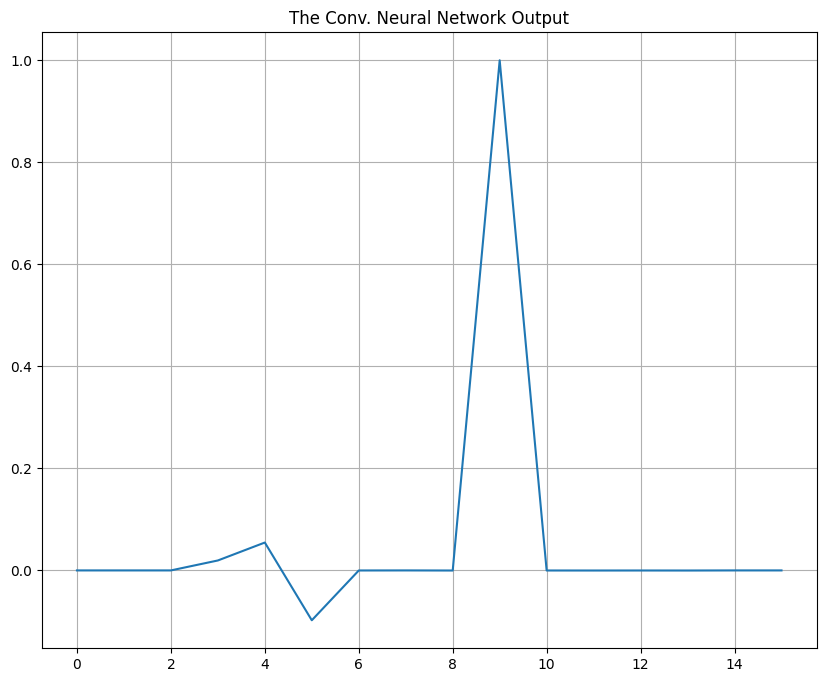

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(prediction)
plt.title('The Conv. Neural Network Output')
plt.grid()

## Real-Time Online-Implementation of Convolutional Neural Networks

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/3j2wA2YFn4I?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

For a keras convolutional network it is assumed that the entire data is already in memory, but in real-time, online processing, for instance for real-time audio or wireless processing, it needs to be processed as the data arrives, sample- or blockwise.

Instead of the Convent "sliding" the filter along the samples, here we slide the samples along the filter, implemented using a Dense net.

For that we need to convert the weights data format! For our **Conv1D** layer, the **weights** have the following **format**. It is an array of an array:

[0: filter weights, 1: bias for first layer]<br>
[filterlength, channels (subbands) in previous layer, neurons/filters in this layer]

The **weight format** for our desired “Dense” layer is the following:

[0: weights, 1: bias for first layer]<br>
[total weights=filterweights * channels (subbands or neurons) in previous layer (timereversed), neurons/filters in this layer]

We also need to observe that the convolution is a correlation with the flipped coefficients. In Our implementation we chose to keep the order of the weights, but flip the input signal instead.

Hence the weigh conversion from Conv1D to Dense is mainly a dimensionality reduction:

`weights[0]=weights[0][:,0,:]`

The signal is input into a shifting buffer, such that it appears fliped in time, meaning the latest sample appears at index 0:

```python
#"slide" buffer contest one sample "up":
signalblock[:,1:]=signalblock[:,0:-1]
#assign current value to "buttom".
#This flips the signal, since the newest value appears at the
lowest index:
signalblock[0,0]= X[0,sampind]
```





Our example program reads in the weights from the training of "Keras Simple Convnet”, from the file “convnetweights.pickle”.

\# -*- coding: utf-8 -*-
__author__ = 'Gerald Schuller'
__copyright__ = 'G.S.'

"""
Simple program to implement a convolutional neural network, or an analysis filter bank, using a keras dense net, for real time audio or wireless processing. For a keras convolutional network it is assumed that the entire data is already in memory, but in real time processing it needs to be processed as it arrives, sample- or block-wise.
Instead of Convent "sliding" the filter along the samples, here we slide the samples along the filter, implemented using a Dense net.
Gerald Schuller, May 2018.
"""

In [ ]:
# keras_simpl_convdensenet.py
from keras.models import Sequential
from keras.layers.core import Dense, Activation

import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

filtlen=8

In [ ]:
def generate_model():
    #    Method to construct a convolutional neural network using keras and theano.
    #    :return: Trainable object

    # Define the model.
    model = Sequential()
    #Obtain a linear filter from a convolutional layer, similar to a matched filter:
    model.add(Dense(units=1, activation='linear', use_bias=False, input_shape=(filtlen,)))

    return model

In [ ]:
def generate_data():
    #Method to generate some artificial data in an numpy array form in order to fit the Dense network.
    #:return: data X: I

    #Input signal X, a Ramp function:
    X= np.hstack((np.zeros((1,9)),np.expand_dims(np.arange(5),axis=0),np.zeros((1,9)))) #ramp as simple signal to detect
    #Make it unit L2 norm:
    X= X/np.sqrt(np.dot(X,X.transpose()))
    #Make input a shape that keras expects,
    #For Dense net: input X with shape (batch, length),

    return X

In [ ]:
#   Demonstration on using the code.

#Open weights file:
with open("convnetweights.pickle", 'rb') as weightfile:
    weights=pickle.load(weightfile)
print("weights[0].shape=", weights[0].shape)

weights[0].shape= (8, 1, 1)


In [ ]:
#Convert Conv1D to Dense weights:################################
#weight format for Conv1d:
#[0: filter weights, 1: bias for first layer]
#[filterlength, channels (subbands) in previous layer, neurons/filters in this layer]
#weight format for Dense:
#[0: weights, 1: bias for first layer]
#[total weights=filterweights * channels (subbands or neurons) in previous layer (time-reversed), neurons/filters in this layer]
#remove "channels" dimension, since we only have 1 channel here:
weights[0]=weights[0][:,0,:]
print("weights[0].shape=", weights[0].shape)
#flip filter or weights dimension, because convolution is correlation with flipped weights:
weights[0]=np.flip(weights[0], axis=0)
#Signal is flipped, so the weights don't need to be flipped.
model = generate_model()
#assign the converted weights:
model.set_weights(weights)

weights[0].shape= (8, 1)


In [ ]:
#Aquire Input signal X, the Ramp function:
X = generate_data()
print("X.shape=", X.shape)
#initialize "sliding" block buffer for the signal, as input for the Dense net:
signalblock=np.zeros((1,filtlen))

X.shape= (1, 23)


In [ ]:
predictionsbuffer=np.zeros(X.shape[1])

#Simulate the samples coming samplewise from e.g. a sound card:
print("X.shape[1]=",X.shape[1])
for sampind in range(X.shape[1]):
    #"slide" buffer contest one sample "up":
    signalblock[:,1:]=signalblock[:,0:-1]
    #assign current value to "buttom".
    #This flips the signal, since the newest value appears at the lowest index:
    signalblock[0,0]= X[0,sampind]
    #obtain model output for the block input:
    prediction=model.predict(signalblock)
    print("prediction.shape=", prediction.shape)
    #Outputs are collected in the buffer:
    predictionsbuffer[sampind]=prediction

X.shape[1]= 23
1/1 [==============================] - 0s 62ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 21ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 21ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 24ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 25ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 24ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 21ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 23ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 31ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 20ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 26ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 28ms/step
prediction.shape= (1, 1)
1/1 [==============================] - 0s 36ms/step
predictio

predictionsbuffer.shape= (23,)


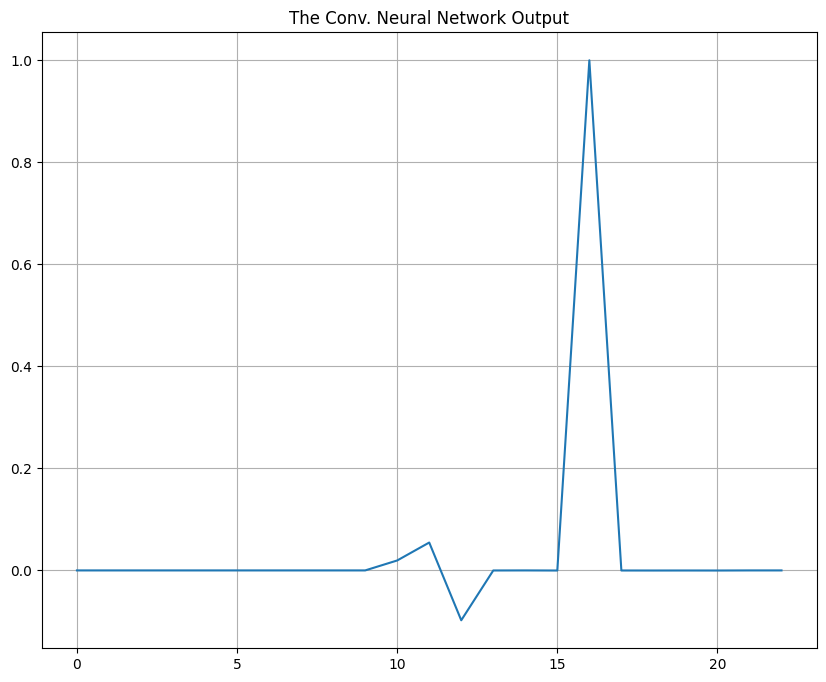

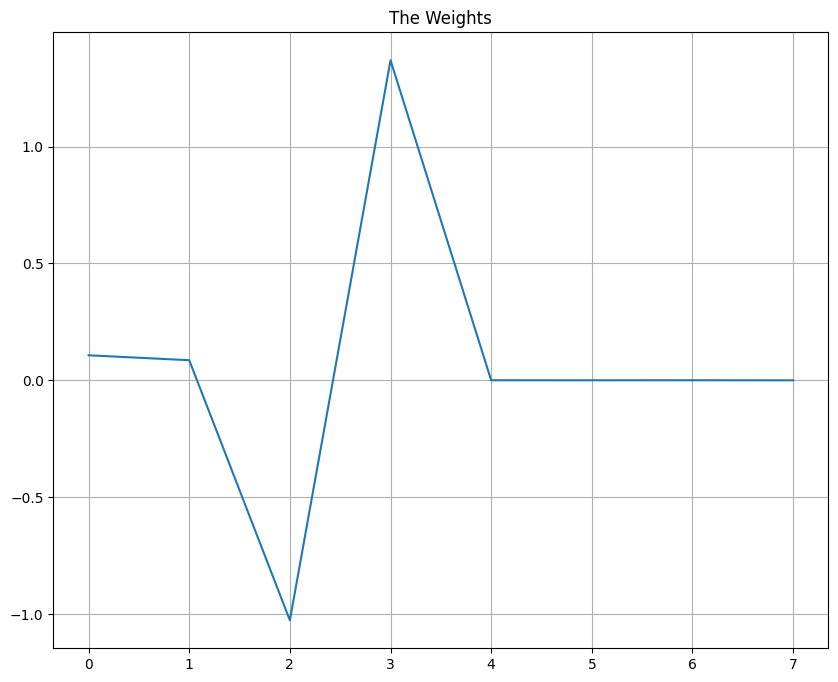

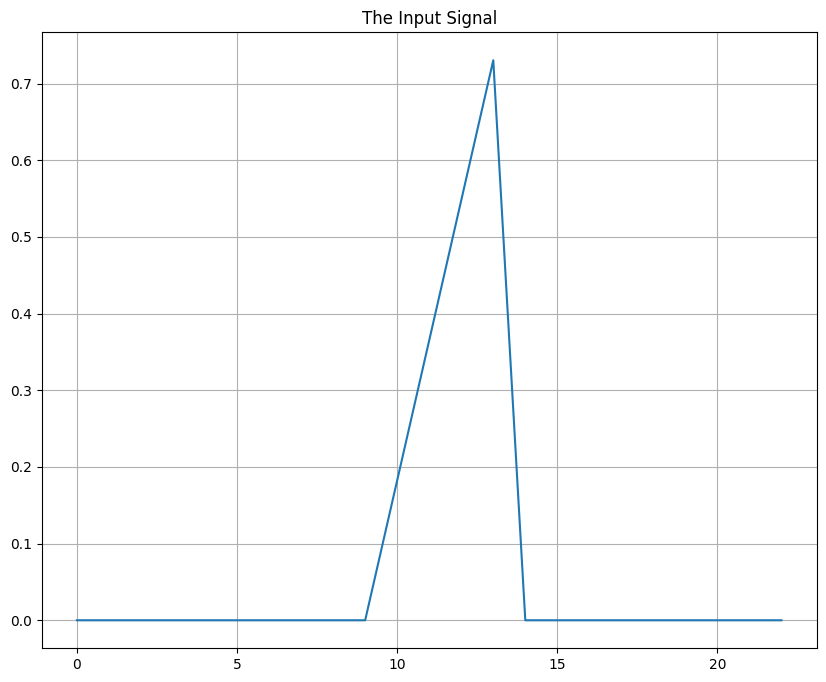

In [ ]:
print("predictionsbuffer.shape=", predictionsbuffer.shape)
plt.figure(figsize=(10,8))
plt.plot(predictionsbuffer)
plt.title('The Conv. Neural Network Output')
plt.grid()
plt.figure(figsize=(10,8))
plt.plot(weights[0])
plt.grid()
plt.title('The Weights')
plt.figure(figsize=(10,8))
plt.plot(X[0,:])
plt.title('The Input Signal')
plt.grid()

**Observe:** We get the identical output as from our Convnet, but now we get 1 output sample for each new input sample.